In [1]:
# Standard Imports
import os
from os.path import join as pjoin
import sys
import warnings

sys.path.append("scripts")
warnings.filterwarnings("ignore")

# Relative Imports
from scripts import *

Prepare folder names and the names of the files from the dataset.

In [2]:
data_folder = pjoin("..", "data")  # all non-for-main-text data
sounds_folder = pjoin(data_folder, "target_sounds_1")  # target sounds
bg_sounds_folder = pjoin(data_folder, "background_sounds")  # background sounds
output_folder = pjoin(data_folder, "output")  # misc output: mixtures, resynths
masks_folder = pjoin(data_folder, "masks")  # precomputed IBMs for clean signals
text_include_folder = pjoin("..", "text", "src", "include")  # images for the main text

file_names = os.listdir(sounds_folder)
bg_file_names = os.listdir(bg_sounds_folder)
print(f"{len(file_names)} TARGET sounds:\n{file_names}\n\n"
      f"{len(bg_file_names)} BACKGROUND sounds:\n{bg_file_names}")

34 TARGET sounds:
['A3_major_fast.wav', 'A3_major_moderato.wav', 'A3_minor_harmonic_fast.wav', 'A3_minor_harmonic_moderato.wav', 'A3_minor_melodic_fast.wav', 'A3_minor_melodic_moderato.wav', 'A3_minor_natural_fast.wav', 'A3_minor_natural_moderato.wav', 'C3_major_repeats.wav', 'C4_major_fast.wav', 'C4_major_moderato.wav', 'C4_major_repeats.wav', 'C5_major_repeats.wav', 'C6_major_repeats.wav', 'D4_major_fast.wav', 'D4_major_moderato.wav', 'E4_major_fast.wav', 'E4_major_moderato.wav', 'E4_minor_harmonic_fast.wav', 'E4_minor_harmonic_moderato.wav', 'E4_minor_melodic_fast.wav', 'E4_minor_melodic_moderato.wav', 'E4_minor_natural_fast.wav', 'E4_minor_natural_moderato.wav', 'F4_major_fast.wav', 'F4_major_moderato.wav', 'G4_major_fast.wav', 'G4_major_moderato.wav', 'H4_major_fast.wav', 'H4_major_moderato.wav', 'Perfect_melodic_fourths_C3_C6.wav', 'Perfect_melodic_octaves_C3_F5.wav', 'Semitones_C2_H3.wav', 'Semitones_C4_H5.wav']

36 BACKGROUND sounds:
['bg_sound_01.wav', 'bg_sound_02.wav', 'bg_s

Process the input sounds and save the computed IBMs for further experiments. Store the sounds, cochleagrams and IBMs to variables (for the follow-up cells that create datasets for classification). Uncomment to run (this cell, however, takes ~20 minutes on my machine).

In [3]:
# sounds, cochleagrams, ibms = process_all(file_names, save_ibm=True, draw_plot=False)

Loaded sound "..\data\target_sounds_1\A3_major_fast.wav". Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! 
Execution time: 17.918214797973633 s
Loaded sound "..\data\target_sounds_1\A3_major_moderato.wav". Duration: 18.26133333 s, samples: 876544, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! 
Execution time: 59.456361532211304 s
Loaded sound "..\data\target_sounds_1\A3_minor_harmonic_fast.wav". Duration: 7.97866667 s, samples: 382976, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! 
Execution time: 17.176201343536377 s
Loaded sound "..\data\target_sounds_1\A3_minor_harmonic_moderato.wav". Duration: 21.312 s, samples: 1022976, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done

Create two datasets for experiments with a simple classifier and save it to files in the root "data" folder (will be loaded later in the notebook).

In [4]:
white_noise_samples = 2 * len(file_names)  # 40% of overall number are samples with random white noise levels
other_bg_samples = 2 * len(file_names)  # 40% of overall number are samples with other random backgrounds with random amplitudes

The **first** dataset contains masked cochleagrams (uncomment to run, however takes a lot of time).

In [5]:
# data, labels = create_dataset(
#     file_names, white_noise_samples, other_bg_samples, bg_file_names=bg_file_names, mask_samples=True,
#     save_to_file=True, data_file_path=pjoin(data_folder, "masked_data_1.npy"), labels_file_path=pjoin(data_folder, "masked_labels_1.npy"),
#     sounds=sounds, cochleagrams=cochleagrams, ibms=ibms
# )
# print(data.shape, labels.shape)

(170, 556928) (170,)


The **second** dataset contains **UN**masked cochleagrams (uncomment to run, however takes a lot of time).

In [6]:
# data, labels = create_dataset(
#     file_names, white_noise_samples, other_bg_samples, bg_file_names=bg_file_names, mask_samples=False,
#     save_to_file=True, data_file_path=pjoin(data_folder, "unmasked_data_1.npy"), labels_file_path=pjoin(data_folder, "unmasked_labels_1.npy"),
#     sounds=sounds, cochleagrams=cochleagrams, ibms=ibms
# )
# print(data.shape, labels.shape)

(170, 556928) (170,)


---
### An Example of Processing

Loaded sound "..\data\target_sounds_1\C5_major_repeats.wav". Duration: 26.00533333 s, samples: 1248256, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

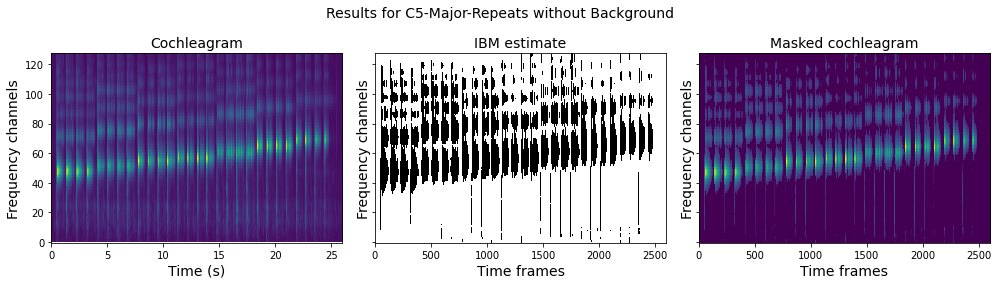


Execution time: 66.66645812988281 s


In [7]:
_ = process("C5_major_repeats.wav", save_resynth=True, draw_plot=True,
            plot_title="Results for C5-Major-Repeats without Background")

---
### Experiments with White Noise

In [8]:
file_name = "A3_major_fast.wav"

**Attempts for Straight-Forward Processing**

Loaded sound "..\data\target_sounds_1\A3_major_fast.wav". Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

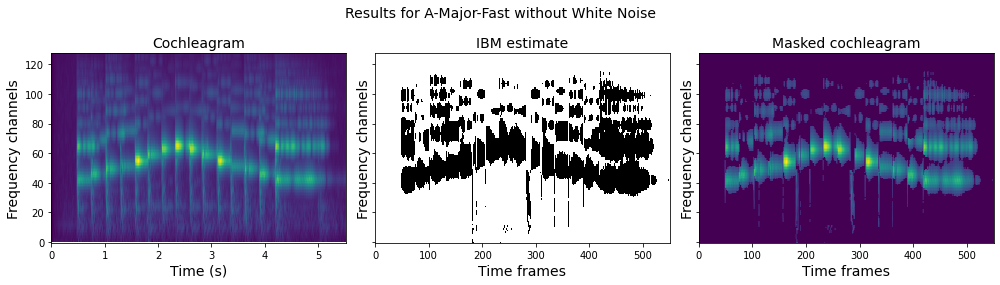


Execution time: 15.7912437915802 s


In [9]:
_ = process(file_name, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_A-major-fast_WN_0,0.jpg"),
            draw_plot=True, plot_title="Results for A-Major-Fast without White Noise")

Loaded sound "..\data\target_sounds_1\A3_major_fast.wav". Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

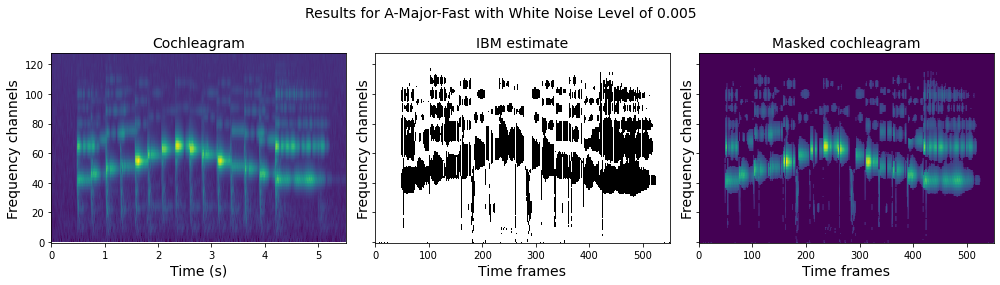


Execution time: 15.738128185272217 s


In [10]:
_ = process(file_name, noise_level=0.005, save_noised=True, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_A-major-fast_WN_0,005.jpg"),
            draw_plot=True, plot_title="Results for A-Major-Fast with White Noise Level of 0.005")

Loaded sound "..\data\target_sounds_1\A3_major_fast.wav". Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

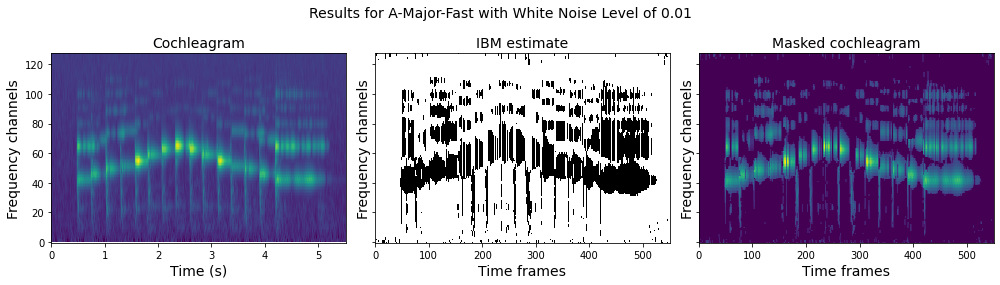


Execution time: 16.06859254837036 s


In [11]:
_ = process(file_name, noise_level=0.01, save_noised=True, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_A-major-fast_WN_0,01.jpg"),
            draw_plot=True, plot_title="Results for A-Major-Fast with White Noise Level of 0.01")

Loaded sound "..\data\target_sounds_1\A3_major_fast.wav". Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

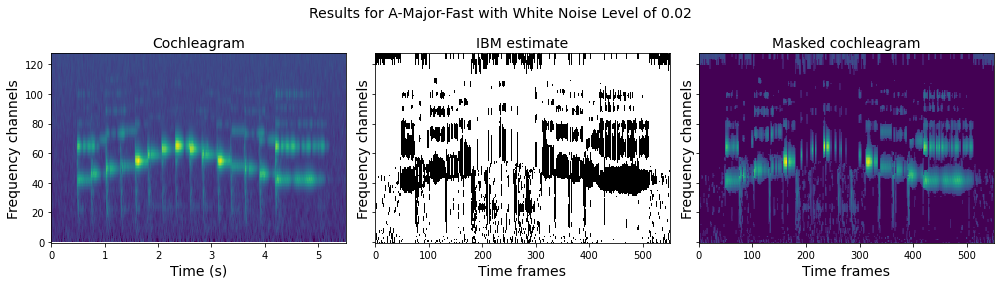


Execution time: 14.912245035171509 s


In [12]:
_ = process(file_name, noise_level=0.02, save_noised=True, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_A-major-fast_WN_0,02.jpg"),
            draw_plot=True, plot_title="Results for A-Major-Fast with White Noise Level of 0.02", )

Loaded sound "..\data\target_sounds_1\A3_major_fast.wav". Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

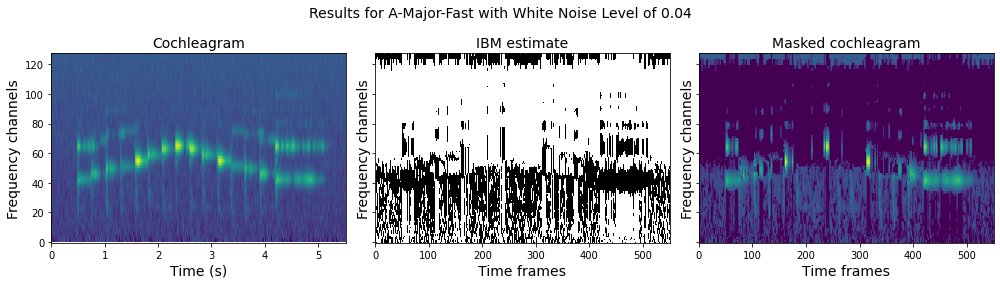


Execution time: 16.00000548362732 s


In [13]:
_ = process(file_name, noise_level=0.04, save_noised=True, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_A-major-fast_WN_0,04.jpg"),
            draw_plot=True, plot_title="Results for A-Major-Fast with White Noise Level of 0.04")

---
**An example of a Memory-Based approach**

Loaded sound "..\data\target_sounds_1\A3_major_fast.wav". Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz.
Cochleagram... done! Loading IBM from "..\data\masks\A3_major_fast.npy"... done! Masking... done! Resynthesis... done! 

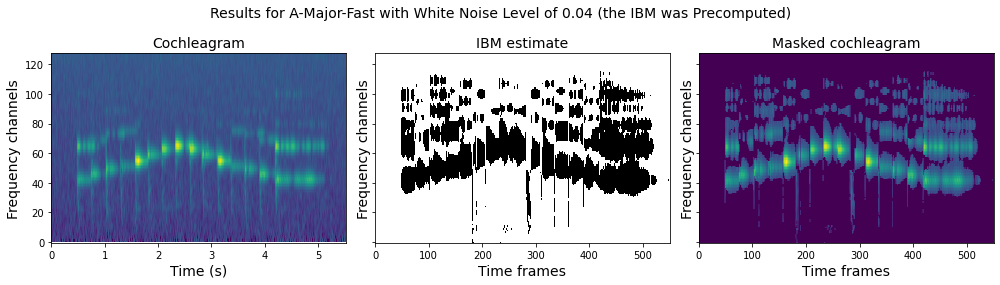


Execution time: 4.16363000869751 s


In [14]:
_ = process(file_name, noise_level=0.04, load_ibm_from=pjoin(masks_folder, "A3_major_fast.npy"),
            save_resynth=True, resynth_file_path=pjoin(output_folder, "A3_major_fast_WN_0,04_memory_resynth.wav"),
            draw_plot=True, plot_title="Results for A-Major-Fast with White Noise Level of 0.04 (the IBM was Precomputed)")

---
### Experiments with Other Backgrounds

In [3]:
file_name = "G4_major_fast.wav"

Loaded sound "..\data\target_sounds_1\G4_major_fast.wav". Duration: 6.80533333 s, samples: 326656, samplerate: 48. kHz.
Loaded sound "..\data\background_sounds\bg_sound_02.wav". Duration: 20.64 s, samples: 990720, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

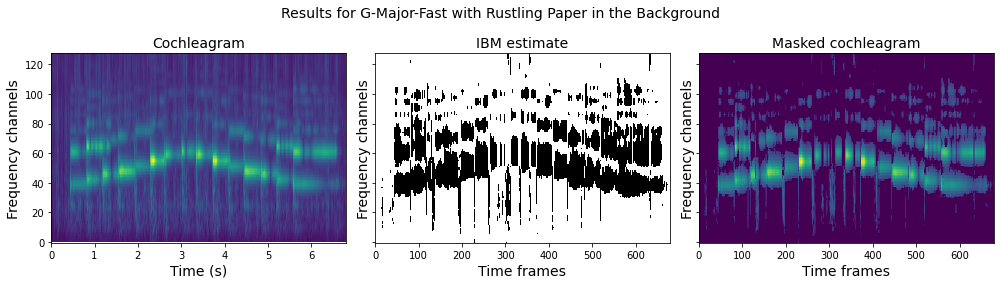


Execution time: 17.52614712715149 s


In [11]:
_ = process(file_name, noise_level=0.2, bg_file_name="bg_sound_02.wav", save_noised=True, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_G-major-fast_BG2.jpg"),
            draw_plot=True, plot_title="Results for G-Major-Fast with Rustling Paper in the Background")

Loaded sound "..\data\target_sounds_1\G4_major_fast.wav". Duration: 6.80533333 s, samples: 326656, samplerate: 48. kHz.
Loaded sound "..\data\background_sounds\bg_sound_03.wav". Duration: 21.28 s, samples: 1021440, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

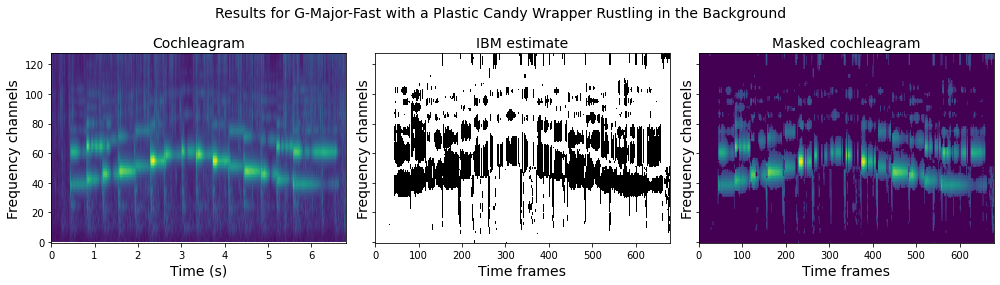


Execution time: 17.707573175430298 s


In [9]:
_ = process(file_name, noise_level=0.5, bg_file_name="bg_sound_03.wav", save_noised=True, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_G-major-fast_BG3.jpg"),
            draw_plot=True, plot_title="Results for G-Major-Fast with a Plastic Candy Wrapper Rustling in the Background")

Loaded sound "..\data\target_sounds_1\G4_major_fast.wav". Duration: 6.80533333 s, samples: 326656, samplerate: 48. kHz.
Loaded sound "..\data\background_sounds\bg_sound_06.wav". Duration: 23.04 s, samples: 1105920, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

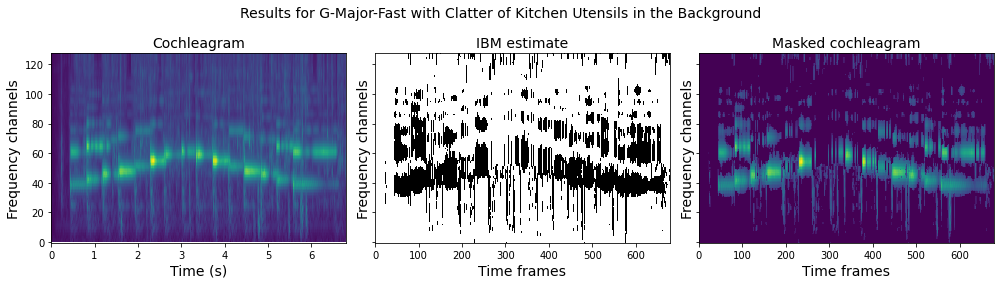


Execution time: 18.617424488067627 s


In [13]:
_ = process(file_name, noise_level=0.4, bg_file_name="bg_sound_06.wav", save_noised=True, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_G-major-fast_BG6.jpg"),
            draw_plot=True, plot_title="Results for G-Major-Fast with Clatter of Kitchen Utensils in the Background")

Loaded sound "..\data\target_sounds_1\G4_major_fast.wav". Duration: 6.80533333 s, samples: 326656, samplerate: 48. kHz.
Loaded sound "..\data\background_sounds\bg_sound_17.wav". Duration: 22.4 s, samples: 1075200, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

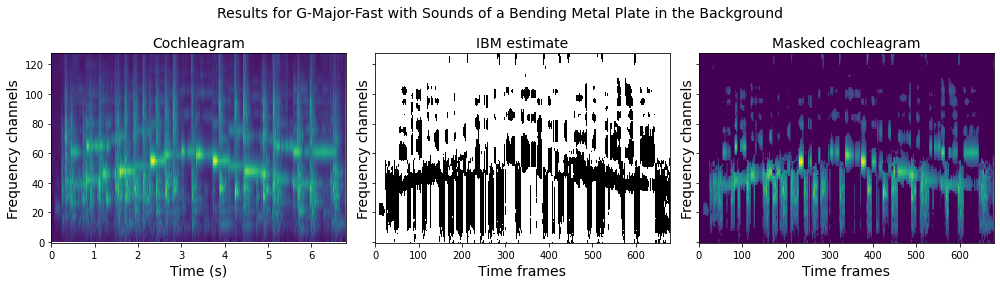


Execution time: 18.867620944976807 s


In [7]:
_ = process(file_name, noise_level=0.6, bg_file_name="bg_sound_17.wav", save_noised=True, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_G-major-fast_BG17.jpg"),
            draw_plot=True, plot_title="Results for G-Major-Fast with Sounds of a Bending Metal Plate in the Background")

Loaded sound "..\data\target_sounds_1\G4_major_fast.wav". Duration: 6.80533333 s, samples: 326656, samplerate: 48. kHz.
Loaded sound "..\data\background_sounds\bg_sound_27.wav". Duration: 21.92 s, samples: 1052160, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

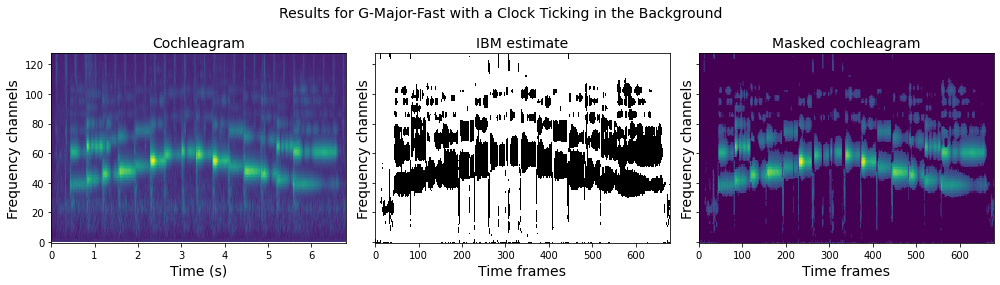


Execution time: 17.812033891677856 s


In [20]:
_ = process(file_name, noise_level=15.0, bg_file_name="bg_sound_27.wav", save_noised=True, save_resynth=True,
            save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_G-major-fast_BG27.jpg"),
            draw_plot=True, plot_title="Results for G-Major-Fast with a Clock Ticking in the Background")

---
### Using a Simple Classifier to Evaluate the Results

In [3]:
validation_size = 0.4

def print_prediction_results(expected_file, predicted):
    print(predicted, "- CORRECT" if predicted == expected_file.split(".")[0] else "- INCORRECT")

**A model trained on unmasked samples:**

In [4]:
data, labels = load_dataset(data_file_path=pjoin(data_folder, "unmasked_data_1.npy"), labels_file_path=pjoin(data_folder, "unmasked_labels_1.npy"))

Loaded dataset of shape (170, 556928) (dtype=float32) and corresponding labels of shape (170,) (dtype=int16)


In [5]:
model = train_classifier(data, labels, validation_size)

Trained model: DecisionTreeClassifier
Best hyperparameters: {'max_depth': 10, 'criterion': 'entropy'}, search time: 430.45329999923706 s
Training time: 33.81687331199646 s
Accuracy scores: train - 100.00% (102 samples), validation - 41.18% (68 samples)


Predictions for **unmasked** cochleagrams:

In [6]:
file_name = "C4_major_repeats.wav"

print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, noise_level=0.001))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, noise_level=0.01))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, noise_level=0.1))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, noise_level=1.0))

C4_major_moderato - INCORRECT
C4_major_moderato - INCORRECT
C4_major_repeats - CORRECT
E4_major_moderato - INCORRECT


In [7]:
file_name = "Perfect_melodic_fourths_C3_C6.wav"
bg_file_name = "bg_sound_10.wav"

print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, bg_file_name=bg_file_name, noise_level=0.001))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, bg_file_name=bg_file_name, noise_level=0.01))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, bg_file_name=bg_file_name, noise_level=0.1))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, bg_file_name=bg_file_name, noise_level=1.0))

Perfect_melodic_fourths_C3_C6 - CORRECT
Perfect_melodic_fourths_C3_C6 - CORRECT
Perfect_melodic_fourths_C3_C6 - CORRECT
Perfect_melodic_fourths_C3_C6 - CORRECT
Perfect_melodic_fourths_C3_C6 - CORRECT


Predictions for **masked** cochleagrams:

In [8]:
file_name = "E4_minor_harmonic_moderato.wav"

print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True, noise_level=0.001))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True, noise_level=0.01))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True, noise_level=0.1))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True, noise_level=1.0))

E4_minor_harmonic_moderato - CORRECT
E4_minor_harmonic_moderato - CORRECT
E4_minor_harmonic_moderato - CORRECT
E4_minor_harmonic_moderato - CORRECT
E4_minor_melodic_moderato - INCORRECT


In [9]:
file_name = "Semitones_C2_H3.wav"
bg_file_name = "bg_sound_15.wav"

print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True,
                                                    bg_file_name=bg_file_name, noise_level=0.001))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True,
                                                    bg_file_name=bg_file_name, noise_level=0.01))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True,
                                                    bg_file_name=bg_file_name, noise_level=0.1))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True,
                                                    bg_file_name=bg_file_name, noise_level=1.0))

Semitones_C2_H3 - CORRECT
Semitones_C2_H3 - CORRECT
Semitones_C2_H3 - CORRECT
Semitones_C2_H3 - CORRECT
Semitones_C2_H3 - CORRECT


Computing accuracy scores for 100 random (un-)masked samples:

In [10]:
n_tests = 100

In [11]:
_ = compute_model_accuracy(model, file_names, bg_file_names, n_tests, data.shape[1], use_mask=False, noise_level_range=(0.001, 1.0))

Model accuracy on random data (100 samples) without masking: 54.00%
Testing time: 952.4852550029755 s


In [12]:
_ = compute_model_accuracy(model, file_names, bg_file_names, n_tests, data.shape[1], use_mask=True, noise_level_range=(0.001, 1.0))

Model accuracy on random data (100 samples) with masking: 65.00%
Testing time: 1062.1101698875427 s


---
**A model trained on masked samples:**

In [13]:
data, labels = load_dataset(data_file_path=pjoin(data_folder, "masked_data_1.npy"), labels_file_path=pjoin(data_folder, "masked_labels_1.npy"))

Loaded dataset of shape (170, 556928) (dtype=float32) and corresponding labels of shape (170,) (dtype=int16)


In [14]:
model = train_classifier(data, labels, validation_size)

Trained model: DecisionTreeClassifier
Best hyperparameters: {'max_depth': 8, 'criterion': 'entropy'}, search time: 204.49826574325562 s
Training time: 14.951969146728516 s
Accuracy scores: train - 100.00% (102 samples), validation - 95.59% (68 samples)


Predictions for **unmasked** cochleagrams:

In [16]:
file_name = "A3_minor_natural_fast.wav"

print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, noise_level=0.001))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, noise_level=0.01))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, noise_level=0.1))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, noise_level=1.0))

A3_minor_natural_fast - CORRECT
A3_minor_natural_fast - CORRECT
A3_minor_natural_fast - CORRECT
A3_minor_natural_fast - CORRECT


In [17]:
file_name = "Perfect_melodic_octaves_C3_F5.wav"
bg_file_name = "bg_sound_20.wav"

print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, bg_file_name=bg_file_name, noise_level=0.001))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, bg_file_name=bg_file_name, noise_level=0.01))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, bg_file_name=bg_file_name, noise_level=0.1))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, bg_file_name=bg_file_name, noise_level=1.0))

E4_minor_natural_moderato - INCORRECT
E4_minor_natural_moderato - INCORRECT
E4_minor_natural_moderato - INCORRECT
E4_minor_natural_moderato - INCORRECT
E4_minor_natural_moderato - INCORRECT


Predictions for **masked** cochleagrams:

In [18]:
file_name = "H4_major_moderato.wav"

print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True, noise_level=0.001))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True, noise_level=0.01))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True, noise_level=0.1))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True, noise_level=1.0))

H4_major_moderato - CORRECT
H4_major_moderato - CORRECT
H4_major_moderato - CORRECT
H4_major_moderato - CORRECT
H4_major_moderato - CORRECT


In [19]:
file_name = "Semitones_C4_H5.wav"
bg_file_name = "bg_sound_25.wav"

print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True,
                                                    bg_file_name=bg_file_name, noise_level=0.001))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True,
                                                    bg_file_name=bg_file_name, noise_level=0.01))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True,
                                                    bg_file_name=bg_file_name, noise_level=0.1))
print_prediction_results(file_name, make_prediction(model, n_features=data.shape[1], file_names=file_names, file_name=file_name, use_mask=True,
                                                    bg_file_name=bg_file_name, noise_level=1.0))

Semitones_C4_H5 - CORRECT
Semitones_C4_H5 - CORRECT
Semitones_C4_H5 - CORRECT
Semitones_C4_H5 - CORRECT
Semitones_C4_H5 - CORRECT


Computing accuracy scores for 100 random (un-)masked samples:

In [20]:
_ = compute_model_accuracy(model, file_names, bg_file_names, n_tests, data.shape[1], use_mask=False, noise_level_range=(0.001, 1.0))

Model accuracy on random data (100 samples) without masking: 11.00%
Testing time: 955.9458544254303 s


In [21]:
_ = compute_model_accuracy(model, file_names, bg_file_names, n_tests, data.shape[1], use_mask=True, noise_level_range=(0.001, 1.0))

Model accuracy on random data (100 samples) with masking: 92.00%
Testing time: 1099.6448707580566 s


---
### Experiments with the Number of Harmonics

In [23]:
file_name = "Perfect_melodic_octaves_C3_F5.wav"

Loaded sound "..\data\target_sounds_1\Perfect_melodic_octaves_C3_F5.wav". Duration: 36.18133333 s, samples: 1736704, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

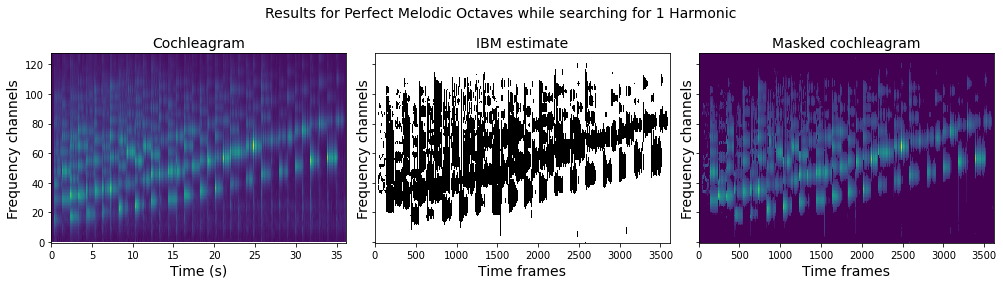


Execution time: 96.6478967666626 s


In [24]:
_ = process(file_name, n_harmonics=1, save_resynth=True, resynth_file_name="Perfect_melodic_octaves_C3_F5_1-H_resynth.wav",
            plot_title="Results for Perfect Melodic Octaves while searching for 1 Harmonic")

Loaded sound "..\data\target_sounds_1\Perfect_melodic_octaves_C3_F5.wav". Duration: 36.18133333 s, samples: 1736704, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

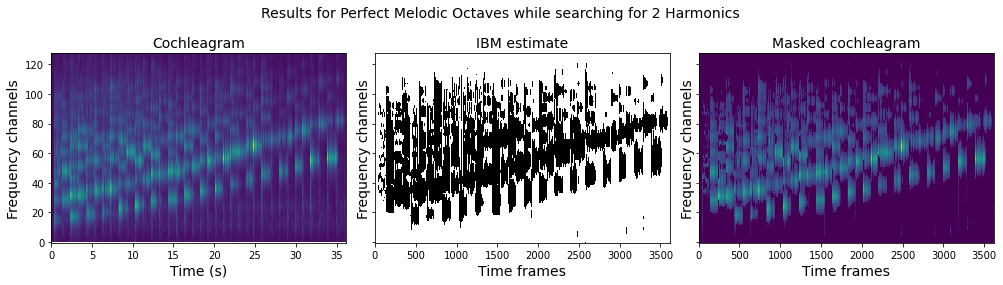


Execution time: 96.52313113212585 s


In [25]:
_ = process(file_name, n_harmonics=2, save_resynth=True, resynth_file_name="Perfect_melodic_octaves_C3_F5_2-H_resynth.wav",
            plot_title="Results for Perfect Melodic Octaves while searching for 2 Harmonics")

Loaded sound "..\data\target_sounds_1\Perfect_melodic_octaves_C3_F5.wav". Duration: 36.18133333 s, samples: 1736704, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

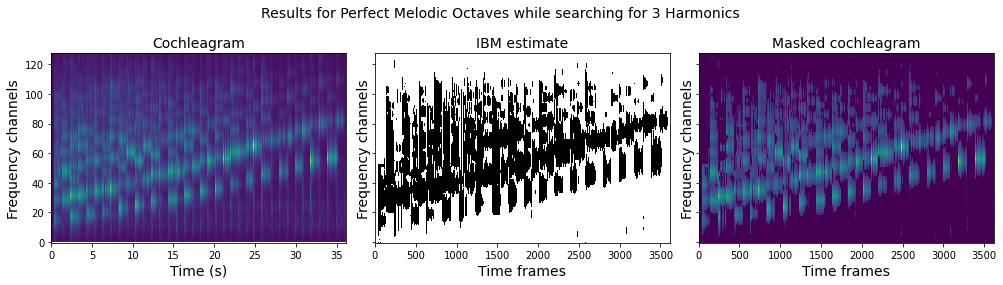


Execution time: 95.17869067192078 s


In [26]:
_ = process(file_name, n_harmonics=3, save_resynth=True, resynth_file_name="Perfect_melodic_octaves_C3_F5_3-H_resynth.wav",
            plot_title="Results for Perfect Melodic Octaves while searching for 3 Harmonics")

Loaded sound "..\data\target_sounds_1\Perfect_melodic_octaves_C3_F5.wav". Duration: 36.18133333 s, samples: 1736704, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

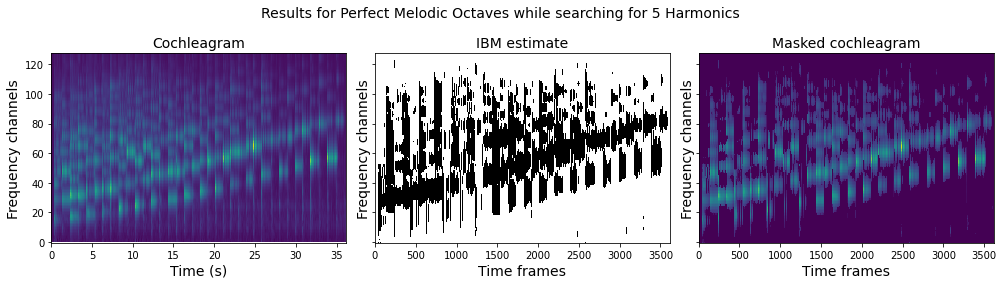


Execution time: 95.9799108505249 s


In [27]:
_ = process(file_name, n_harmonics=5, save_resynth=True, resynth_file_name="Perfect_melodic_octaves_C3_F5_5-H_resynth.wav",
            plot_title="Results for Perfect Melodic Octaves while searching for 5 Harmonics")

Loaded sound "..\data\target_sounds_1\Perfect_melodic_octaves_C3_F5.wav". Duration: 36.18133333 s, samples: 1736704, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

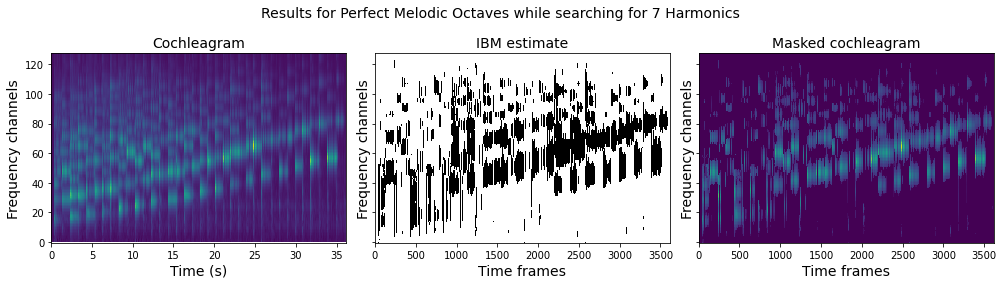


Execution time: 99.4150960445404 s


In [28]:
_ = process(file_name, n_harmonics=7, save_resynth=True, resynth_file_name="Perfect_melodic_octaves_C3_F5_7-H_resynth.wav",
            plot_title="Results for Perfect Melodic Octaves while searching for 7 Harmonics")

Loaded sound "..\data\target_sounds_1\Perfect_melodic_octaves_C3_F5.wav". Duration: 36.18133333 s, samples: 1736704, samplerate: 48. kHz.
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

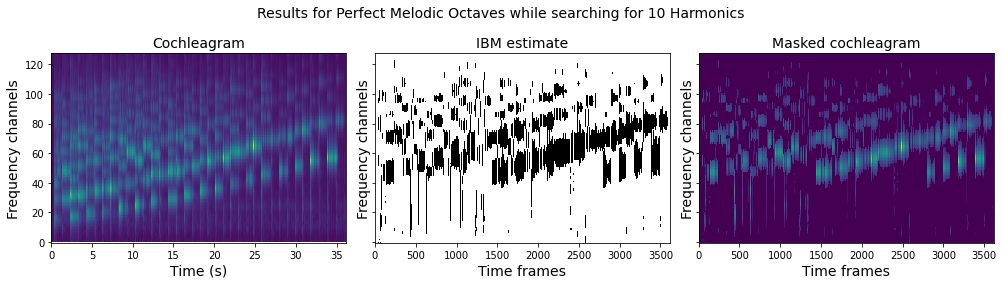


Execution time: 95.11743688583374 s


In [29]:
_ = process(file_name, n_harmonics=10, save_resynth=True, resynth_file_name="Perfect_melodic_octaves_C3_F5_10-H_resynth.wav",
            plot_title="Results for Perfect Melodic Octaves while searching for 10 Harmonics")